# Figure 9 for corrigendum to 2016 JAMES Tracmip introduction paper

Data is taken from ESGF copy of TRACMIP at KIT SCC LSDFONLINE

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# my module functions to load tracmip data, plot colors, model names etc.
import tracmip as tm

# my atmospheric python package for ITCZ calculation
import sys
sys.path.append('/home/fd8940/Dropbox/Python3/mymodules/')
import atmosphere as atm

import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
ts    = np.nanmean(np.array(np.load('./postdata_npz/ts_aquaControlTRACMIP.timmean.npz')['ts']), axis=2)
ua850 = np.array(np.load('./postdata_npz/ua_aquaControlTRACMIP.zonmean.timmean.npz')['ua'])[:,2]

pr_mm = np.nanmean(86400*np.array(np.load('./postdata_npz/pr_aquaControlTRACMIP.ymonmean.npz')['pr']), axis=3)

# time-mean precipitation
pr = np.nanmean(pr_mm, axis=1)

## Calculate time-mean ITCZ position

In [3]:
itcz_tm = np.zeros(tm.nmod)
for i in range(tm.nmod):
    itcz_tm[i] = atm.get_itczposition(pr[i], tm.latint, 30, 0.1)

## Calculate monthly-mean ITCZ position

In [4]:
itcz_mm = np.zeros((tm.nmod, 12)) + np.nan
for i in range(tm.nmod):
    for t in range(0, 12):
        itcz_mm[i, t] = atm.get_itczposition(pr_mm[i, t, :], tm.latint, 30, 0.1)

## Note: Caltech seasonal cycle shifted by 3 months

In [5]:
tmp = np.copy(itcz_mm[13,:])
itcz_mm[13,3:12] = tmp[0:9]
itcz_mm[13,0:3 ] = tmp[9:12]

## Plotting

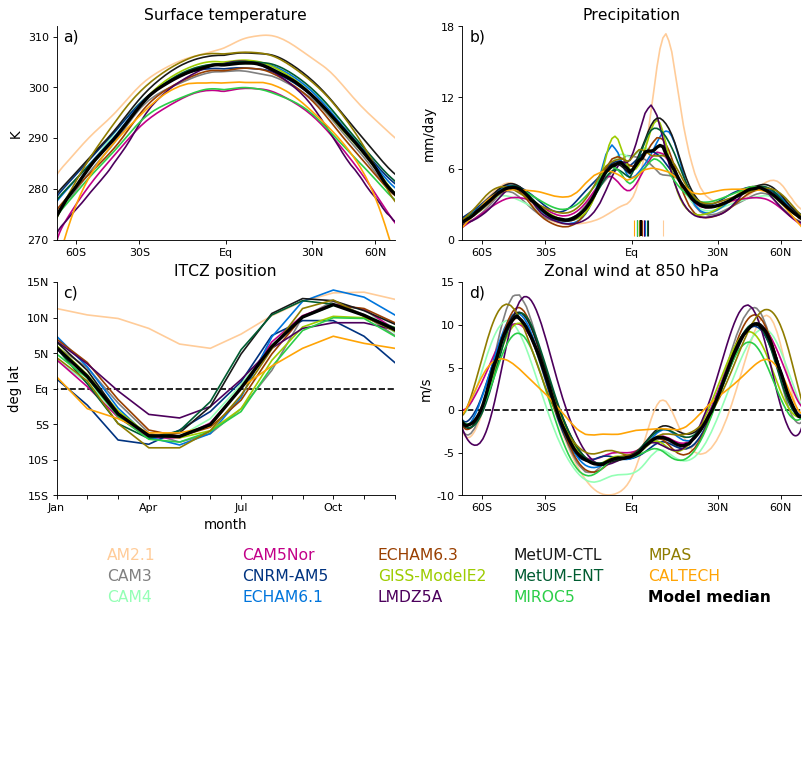

In [6]:
sinlat = np.sin(tm.latint*np.pi/180)
month  = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
nmonth = month.size

fig = plt.figure( figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k' )

ax = plt.subplot(3, 2, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

for m in range(tm.nmod):
    plt.plot(sinlat, ts[m, :], color=tm.modcolors[m])
plt.plot(sinlat, np.nanmedian(ts, axis=0), 'k', linewidth=3)
plt.xlim(-0.98, 0.98), plt.ylim(270, 312)
ax.xaxis.set_ticks([-0.866, -0.5, 0, 0.5, 0.866])
ax.xaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=10)
ax.yaxis.set_ticks([270, 280, 290, 300, 310])
ax.yaxis.set_ticklabels([270, 280, 290, 300, 310], fontsize=10) 
plt.title('Surface temperature', fontsize=14)
plt.ylabel('K', fontsize=12)
plt.text(0.02, 0.95, 'a)', fontsize=14, ha='left', va='center', transform=ax.transAxes)
   

ax = plt.subplot(3, 2, 2)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

for m in range(tm.nmod):
    plt.plot(sinlat, pr[m, :], color=tm.modcolors[m])
    plt.plot(np.sin(itcz_tm[m]*np.pi/180.0), 1, '|', mew=1, ms=15, color=tm.modcolors[m])
plt.plot(sinlat, np.nanmedian(pr, axis=0), 'k', linewidth=3) 
plt.plot(np.sin(np.nanmedian(itcz_tm)*np.pi/180.0), 1, '|', mew=2, ms=15, color='k')
plt.xlim(-0.98, 0.98), plt.ylim(0, 18)
ax.xaxis.set_ticks([-0.866, -0.5, 0, 0.5, 0.866])
ax.xaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=10)
ax.yaxis.set_ticks([0, 6, 12, 18])
ax.yaxis.set_ticklabels([0, 6, 12, 18], fontsize=10) 
plt.title('Precipitation', fontsize=14)
plt.ylabel('mm/day', fontsize=12)
plt.text(0.02, 0.95, 'b)', fontsize=14, ha='left', va='center', transform=ax.transAxes)

ax = plt.subplot(3, 2, 3)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot([-20, 20], [0, 0], 'k--')
for m in range(tm.nmod):
    plt.plot(month, itcz_mm[m, :], color=tm.modcolors[m])
plt.plot(month, np.nanmedian(itcz_mm, axis=0), 'k', linewidth=3)
plt.xlim(1, 12), plt.ylim(-15, 15)
ax.xaxis.set_ticks(month)
ax.xaxis.set_ticklabels(['Jan', '', '', 'Apr', '', '', 'Jul', '', '' ,'Oct', '', ''], fontsize=10)
ax.yaxis.set_ticks([-15, -10, -5, 0, 5, 10, 15])
ax.yaxis.set_ticklabels(['15S', '10S', '5S', 'Eq', '5N', '10N', '15N'], fontsize=10) 
plt.title('ITCZ position', fontsize=14)
plt.xlabel('month', fontsize=12)
plt.ylabel('deg lat', fontsize=12)
plt.text(0.02, 0.95, 'c)', fontsize=14, ha='left', va='center', transform=ax.transAxes)
   
ax = plt.subplot(3, 2, 4)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot([-10, 10], [0, 0], 'k--')
for m in range(tm.nmod):
    plt.plot(sinlat, ua850[m, :], color=tm.modcolors[m])
plt.plot(sinlat, np.nanmedian(ua850, axis=0), 'k', linewidth=3)

plt.xlim(-0.98, 0.98), plt.ylim(-10, 15)
ax.xaxis.set_ticks([-0.866, -0.5, 0, 0.5, 0.866])
ax.xaxis.set_ticklabels(['60S', '30S', 'Eq', '30N', '60N'], fontsize=10)
ax.yaxis.set_ticks([-10, -5, 0, 5, 10, 15])
ax.yaxis.set_ticklabels([-10, -5, 0, 5, 10, 15], fontsize=10)
plt.title('Zonal wind at 850 hPa', fontsize=14)
plt.ylabel('m/s', fontsize=12)
plt.text(0.02, 0.95, 'd)', fontsize=14, ha='left', va='center', transform=ax.transAxes, backgroundcolor='white')

ax = plt.subplot(3, 2, 5)
plt.xlim(0, 1), plt.ylim(0, 1)
plt.axis('off')
ystart=1.0
delta=0.1
for m in range(tm.nmod):
    if np.int(tm.modnumbers[m])<4:
        plt.text(0.15, ystart-delta*np.float(tm.modnumbers[m]), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)
    elif np.int(tm.modnumbers[m])<7:
        plt.text(0.55, ystart-delta*(np.float(tm.modnumbers[m])-3), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)
    elif np.int(tm.modnumbers[m])<10:
        plt.text(0.95, ystart-delta*(np.float(tm.modnumbers[m])-6), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)
    elif np.int(tm.modnumbers[m])<13:
        plt.text(1.35, ystart-delta*(np.float(tm.modnumbers[m])-9), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)
    elif np.int(tm.modnumbers[m])<15:
        plt.text(1.75, ystart-delta*(np.float(tm.modnumbers[m])-12), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)
plt.text(1.75, ystart-delta*3, 'Model median', color='k', fontweight='bold', fontsize=14)
    
plt.tight_layout
plt.savefig('figs/corrigendumpaper_figure9.pdf')